In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib

In [2]:
url="https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path=os.path.join("data", "covid")

In [3]:
os.makedirs(file_path, exist_ok=True)
csv_path= os.path.join(file_path, "WHO-COVID-19-global-data.csv")
urllib.request.urlretrieve(url,csv_path)

('data\\covid\\WHO-COVID-19-global-data.csv',
 <http.client.HTTPMessage at 0x26680d95bd0>)

In [4]:
df=pd.read_csv(csv_path)
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
len(df) - len(df.dropna())

865

In [6]:
df.dropna(inplace = True)

In [7]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.041400e+05,2.041400e+05,204140.000000,204140.000000
mean,2.542106e+03,6.549041e+05,30.676477,12081.182728
std,1.661462e+04,3.450659e+06,162.727623,55858.603754
min,-3.295200e+04,0.000000e+00,-2442.000000,0.000000
25%,0.000000e+00,2.210000e+02,0.000000,3.000000
50%,2.400000e+01,1.198100e+04,0.000000,158.000000
75%,5.080000e+02,1.754122e+05,6.000000,2853.000000
max,1.253115e+06,8.161887e+07,11447.000000,992289.000000


In [8]:
#Lets check for duplicates
len(df)-len(df.drop_duplicates())

0

In [9]:
dm=df.groupby(['Country']).mean()

In [10]:
#Top 10 countries with most number of new cases

In [11]:
df1=dm.sort_values(by=['New_cases'], ascending=False).head(10)
df2=dm.sort_values(by=['Cumulative_cases'], ascending=True).head(20)

In [12]:
df1

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,
United States of America,94357.070520,2.898065e+07,1147.154913,460237.060116
India,49854.105202,1.841722e+07,606.058960,239828.827746
Brazil,35470.628902,1.253032e+07,768.638150,327376.766474
France,32749.472832,6.029492e+06,166.493642,75466.657803
Germany,29748.153757,4.353868e+06,158.958382,62469.862428
The United Kingdom,25618.276301,5.879193e+06,204.734104,93792.906358
Russian Federation,21115.417341,5.384253e+06,436.715607,127279.220809
Republic of Korea,20572.667052,1.333856e+06,27.449711,3083.775723
Italy,19720.084393,3.920943e+06,191.033526,86692.310983


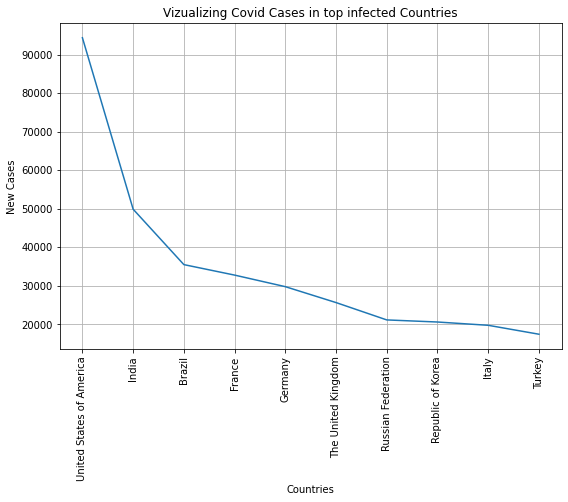

In [13]:
plt.figure(figsize=(9,6))
plt.title('Vizualizing Covid Cases in top infected Countries')
plt.plot(df1.New_cases)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('New Cases')
plt.grid()

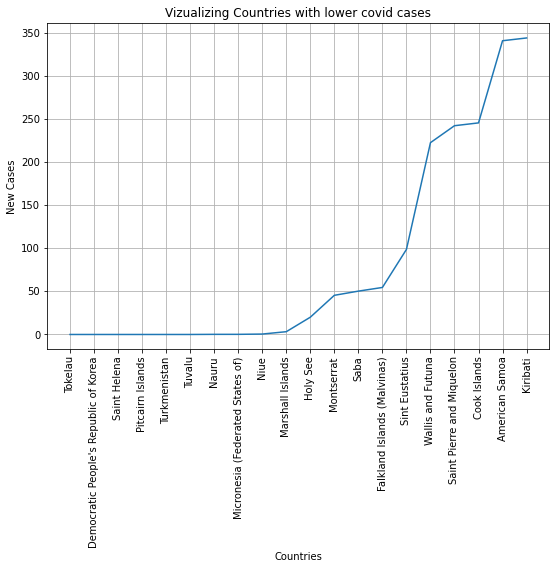

In [14]:
plt.figure(figsize=(9,6))
plt.title('Vizualizing Countries with lower covid cases')
plt.plot(df2.Cumulative_cases)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('New Cases')
plt.grid()

In [15]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [16]:
df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [17]:
df['Month'] = df['Date_reported'].str[5:7]
df['Month'] = df['Month'].astype('int')

In [18]:
dd=df.groupby(['Month']).mean()

In [19]:
dd

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Month,,,,
1,5090.224064,609728.374045,31.413392,11117.407199
2,3477.553689,725082.895115,29.102891,11680.549202
3,2991.160470,822207.541371,23.017815,12545.868280
4,2332.696375,905785.886770,30.679473,13375.778390
5,1694.039168,727568.098653,30.846969,11902.119622
6,1107.529944,390839.797669,29.795410,9149.068079
7,1559.883406,430285.023852,30.925984,10040.815746
8,1921.092195,485891.224986,34.246720,11075.077023
9,1755.134675,543028.555862,30.086794,12072.090395


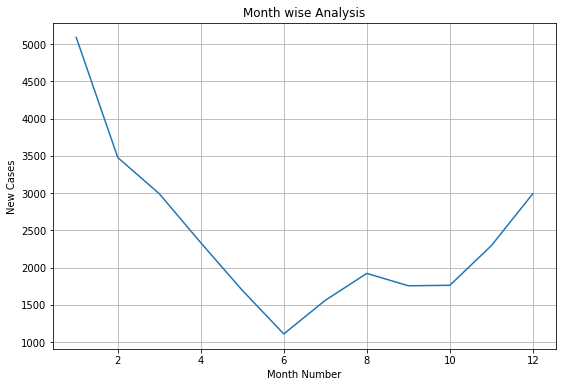

In [23]:
plt.figure(figsize=(9,6))
plt.title('Month wise Analysis')
plt.plot(dd.New_cases)
plt.xlabel('Month Number')
#plt.xticks(rotation=90)
plt.ylabel('New Cases')
plt.grid()

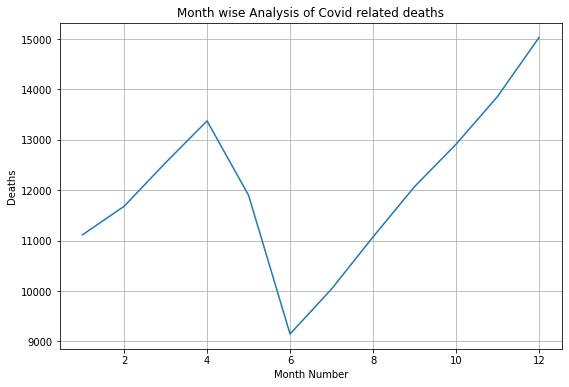

In [37]:

plt.figure(figsize=(9,6))
plt.plot(df.groupby(['Month']).mean()['Cumulative_deaths'])
plt.title('Month wise Analysis of Covid related deaths')
plt.xlabel('Month Number')
#plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.grid()